### Computational Guided Inquiry for Modeling Earth's Climate (Neshyba, 2025)


# Diagnostic Functions

## Three types of modeled variable
Here we are laying the groundwork for a revision of Cambio that provides little more organizational structure to our model. To do this, it's useful to distinguish between three different types of variables in climate modeling: *parametric*, *prognostic*, and *diagnostic*.

1. *Parametric variables* are variables that define a given climate model, such as the anthropogenic emission schedule or the climate sensitivity parameter. 
1. *Prognostic variables* are variables that are used to predict the future evolution of the climate, including (crucially) their own values! In our case, prognostic variables are concentrations of carbon in the carbon reservoirs (atmosphere and oceans), and the fluxes between these reservoirs. 
1. *Diagnostic variables* are values that can be calculated from parametric and prognostic variables that we're interested in, but are not otherwise essential to the model. Examples include the global temperature and ocean pH -- important for the health of the planet, but not needed by the Euler algorithm to calculate concentrations and fluxes as the model progresses from one year to the next.

(We should add that it's possible that as we re-envision our model, we could convert some variables from one type to another. For example, suppose we wanted to recognize a  perfectly plausible feedback loop in which humans actually modified their future carbon emissions in response to the warming caused by past carbon emissions. That would promote global temperature from a diagnostic variable to a prognostic one. But we'll tackle that kind of thing in Cambio3.0.)

## Using dictionaries to organize data
Keeping track of all the variables and metadata involved in this can be very messy business. We've already seen one way to reduce that messiness in our emissions scheduyles through the use of structured variables defined by *Python Dictionaries*. We'll continue that idea here, by collecting *parametric* variables into a Python dictionary called *ClimateParams*.

## Using Python functions to compute diagnostic variables
Going hand in hand with the structural revisions described above, it will be useful to organize how we compute diagnostic variables. We'll do this here by means of Python functions, one function for each diagnostic variable. As you'll see, some of these will be pretty trivial, like adding a constant to a temperature anomaly to compute an actual temperature. And in other cases, the algorithms will get more complex. Here, we'll be using Python functions to take care of that -- along with validation tests (also called "unit tests") that make sure their algorithms are working properly.

## Uploading your emissions file
You'll need to upload your favorite emissions scenario into this space. 

## Learning goals
1. From inspecting the Python code, I can say whether a variable is prognostic, diagnostic, or parameteric.
1. I'm getting really good at creating Python functions.
1. I can extract information from Python dictionaries, and tailor them too.

In [1]:
import numpy as np
import matplotlib.pyplot as plt; plt.rc("figure", figsize=(12,8))
import meclib.cl as cl

### Load your scenario
To get the file you generated in *ScheduledFlows* into your current work space, _download_ it to your laptop or desktop, then _upload_ it to the current folder. 

Once you've done that, in the cell below, first you should assign a filename to your *ScheduledFlows* file, something like this (but using your filename, of course):

    filename = 'Peaks_in_2040.pkl'

Then, use cl.LoadMyScenario to load the scenario into Python as a dictionary named epsdictionary_fromfile. Something like this should work:

    time, eps, epsdictionary_fromfile = cl.LoadMyScenario(filename, verbose=True)

{'dataframe':             time     emissions
0    1750.000000  1.349872e-01
1    1750.667780  1.364919e-01
2    1751.335559  1.380133e-01
3    1752.003339  1.395517e-01
4    1752.671119  1.411073e-01
..           ...           ...
595  2147.328881  5.194863e-07
596  2147.996661  4.596060e-07
597  2148.664441  4.066280e-07
598  2149.332220  3.597567e-07
599  2150.000000  3.182882e-07

[600 rows x 2 columns], 'emission units': 'GtC/year', 'k': 0.0166, 't_0': 2003, 'eps_0': 9, 't_peak': 2040, 't_decarb': 15}


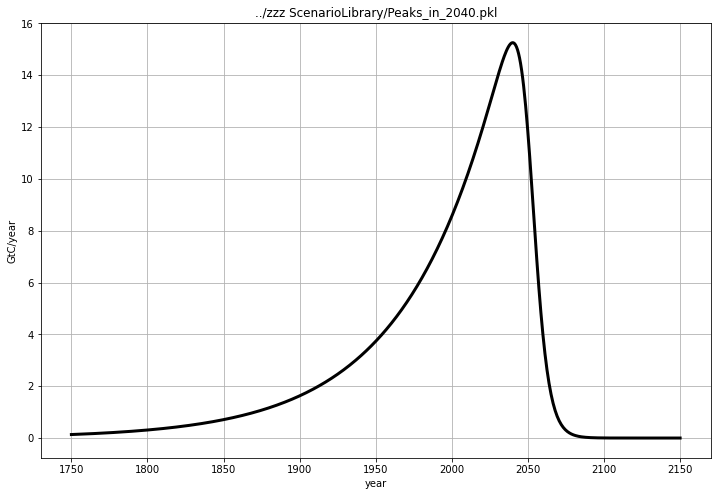

In [2]:
## BEGIN SOLUTION

# Name of the file
filename = '../zzz ScenarioLibrary/Peaks_in_2040.pkl'
time, eps, epsdictionary_fromfile = cl.LoadMyScenario(filename,verbose=True)

### END SOLUTION

### Creating a ClimateParams dictionary
In the cell below, use the CreateClimateParams function -- which resides in the MEclib library -- to create a dictionary. Assuming you named your emissions dictionary "epsdictionary_fromfile," a command like the following will do it:

    ClimateParams = cl.CreateClimateParams(epsdictionary_fromfile)

Then, use display(ClimateParams) to make sure you did that correctly.

In [3]:
### BEGIN SOLUTION
# Create a climate parameters dictionary
ClimateParams = cl.CreateClimateParams(epsdictionary_fromfile)

# Let's see what it has
display(ClimateParams)
### END SOLUTION

{'k_la': 120,
 'k_al0': 110.6842105263158,
 'k_al1': 0.015789473684210527,
 'k_oa': 0.1694051282051282,
 'k_ao': 0.11794871794871795,
 'k': 0.0166,
 'DC': 0.0321,
 'climate sensitivity': 0.005084745762711864,
 'C_atm 2003': 780,
 'F_ao 2003': 92,
 'F_oa 2003': 90,
 'preindustrial C_atm': 590,
 'albedo sensitivity': -102.9948207250004,
 'preindustrial albedo': 0.3,
 'preindustrial pH': 8.2,
 'starting time': 1750.0,
 'k_al1_Tstar': 1.43,
 'k_al1_deltaT': 0.471,
 'fractional_k_al1_floor': 0.684,
 'albedo_Tstar': 2,
 'albedo_delta_T': 1,
 'fractional_albedo_floor': 0.9860834426115428}

### Tailoring your ClimateParams dictionary
It's easy to add items to a dictionary. Below is an example -- the item 'Description' is added.

In [4]:
# Create a description 
ClimateParams['Description'] = "This scenario, authored by ..., specifies an albedo tipping point temperature of 2 degrees"

# Check that it got added correctly
display(ClimateParams)

{'k_la': 120,
 'k_al0': 110.6842105263158,
 'k_al1': 0.015789473684210527,
 'k_oa': 0.1694051282051282,
 'k_ao': 0.11794871794871795,
 'k': 0.0166,
 'DC': 0.0321,
 'climate sensitivity': 0.005084745762711864,
 'C_atm 2003': 780,
 'F_ao 2003': 92,
 'F_oa 2003': 90,
 'preindustrial C_atm': 590,
 'albedo sensitivity': -102.9948207250004,
 'preindustrial albedo': 0.3,
 'preindustrial pH': 8.2,
 'starting time': 1750.0,
 'k_al1_Tstar': 1.43,
 'k_al1_deltaT': 0.471,
 'fractional_k_al1_floor': 0.684,
 'albedo_Tstar': 2,
 'albedo_delta_T': 1,
 'fractional_albedo_floor': 0.9860834426115428,
 'Description': 'This scenario, authored by ..., specifies an albedo tipping point temperature of 2 degrees'}

### Your turn
In the cell below, replace the 'Description' field with something that has your name in it. Then use the display command to verify it was added properly.

In [5]:
### BEGIN SOLUTION

ClimateParams['Description'] = "This scenario, authored by nesh, specifies an albedo tipping point temperature of 2 degrees"
display(ClimateParams)

### END SOLUTION

{'k_la': 120,
 'k_al0': 110.6842105263158,
 'k_al1': 0.015789473684210527,
 'k_oa': 0.1694051282051282,
 'k_ao': 0.11794871794871795,
 'k': 0.0166,
 'DC': 0.0321,
 'climate sensitivity': 0.005084745762711864,
 'C_atm 2003': 780,
 'F_ao 2003': 92,
 'F_oa 2003': 90,
 'preindustrial C_atm': 590,
 'albedo sensitivity': -102.9948207250004,
 'preindustrial albedo': 0.3,
 'preindustrial pH': 8.2,
 'starting time': 1750.0,
 'k_al1_Tstar': 1.43,
 'k_al1_deltaT': 0.471,
 'fractional_k_al1_floor': 0.684,
 'albedo_Tstar': 2,
 'albedo_delta_T': 1,
 'fractional_albedo_floor': 0.9860834426115428,
 'Description': 'This scenario, authored by nesh, specifies an albedo tipping point temperature of 2 degrees'}

## Diagnostic algorithms in functional form
In this part, you'll be writing Python functions that calculate values of diagnostic variables. For each algorithm, we have described the algorithm in mathematical terms. Your task is implement the algorithm as a Python function, then run the function through some benchmark tests. The first one is meant as an example.

### Temperature in Fahrenheit from temperature in Celsius
Algorithm: $T(F) = T(C) \times 9 /5 + 32$, where $T(C)$ is in degrees Celsius.

Benchmark values:
- a temperature of $32 \ F$ if $T(C)=0 \ C$ (freezing temperature of water)
- a temperature of $212 \ F$ if $T(C)=100 \ C$ (boiling temperature of water)

In [6]:
def Diagnose_degreesF(T_C):
    """Returns an actual temperature in degrees F from an actual temperature in degrees C"""

    # Do the conversion to F
    T_F = T_C*9/5+32

    # Return the diagnosed temperature in F
    return(T_F)

# Benchmarking for freezing water (T = 0 degrees C)
print(Diagnose_degreesF(0))

# Benchmarking for boiling water (T = 100 degrees C)
### BEGIN SOLUTION
print(Diagnose_degreesF(100))
### END SOLUTION

32.0
212.0


### Temperature anomaly
Algorithm: 

$$
T_{anomaly} = CS\times(C_{atm}-C_{atm,pre-industrial}) + AS\times(\alpha-\alpha_{pre-industrial})
$$

where $CS$ is the climate sensitivity parameter (degrees warming per GtC increase in atmospheric $CO_2$), and $AS$ is the albedo sensitivity parameter (degrees warming per unit increase in albedo). Note that you'll have to extract the following parameters from ClimateParams (an example is provided in the cell below):

- climate sensitivity
- preindustrial C_atm
- albedo sensitivity
- preindustrial albedo

Benchmarking:
- When $C_{atm}=590 \ GtC$ and $\alpha=0.3$, we should get $T_{anomaly} = 0$.  
- When $C_{atm}=900 \ GtC$ and $\alpha=0.299$, we should get $T_{anomaly} \approx 1.7$.  

In [7]:
# Implementing the algorithm
def Diagnose_T_anomaly(C_atm, alpha, ClimateParams):
    """Returns a temperature anomaly from the carbon amount in the atmosphere"""
    """and ClimateParams' climate_sensitivity and preindust_C_atm"""

    # Extract the climate sensitivity from ClimateParams
    CS = ClimateParams['climate sensitivity']

    # Extract other information we need from ClimateParams, then calculate and return the temperature anomaly
    ### BEGIN SOLUTION
    preindust_C_atm = ClimateParams['preindustrial C_atm']
    AS = ClimateParams['albedo sensitivity']
    preindust_alpha = ClimateParams['preindustrial albedo']
    print('alpha:',preindust_alpha,alpha)
    print('C_atm:', preindust_C_atm,C_atm)
    
    # Calculate the temperature anomaly according to our algorithm
    T_anomaly = CS*(C_atm-preindust_C_atm) + AS*(alpha-preindust_alpha)

    # Return the temperature anomaly
    return(T_anomaly)
    ### END SOLUTION

# Benchmarking
### BEGIN SOLUTION
print(Diagnose_T_anomaly(590,0.3,ClimateParams))
print(Diagnose_T_anomaly(900,0.299,ClimateParams))
### END SOLUTION

alpha: 0.3 0.3
C_atm: 590 590
0.0
alpha: 0.3 0.299
C_atm: 590 900
1.6792660071656782


### Actual temperature from temperature anomaly
Algorithm: $T(actual,C) = (T_{anomaly}+14) $. This algorithm doesn't require any climate parameters, so only T_anomaly is in the argument list. 

Benchmarking:
- return a temperature of 14 degrees C if the temperature anomaly is zero
- return a temperature of 15 degrees C if the temperature anomaly is +1

In [8]:
# Implementing the algorithm
def Diagnose_actual_temperature(T_anomaly):
    """Returns degrees C from a temperature anomaly"""
    ### BEGIN SOLUTION

    T_C = T_anomaly+14

    # Return our diagnosed temperature in degrees C
    return(T_C)
    ### END SOLUTION

# Benchmarking
### BEGIN SOLUTION
print(Diagnose_actual_temperature(0))
print(Diagnose_actual_temperature(1))
### END SOLUTION

14
15


### Ocean surface pH from C_atm
Algorithm: 

$$
pH = -log_{10}(\frac {C_{atm}}{C_{atm,pre-industrial}})+pH_{pre-industrial}
$$

For this function, you'll need to extract some variables from the ClimateParams dictionary:
- "preindustrial pH"
- "preindustrial C_atm"  

Notice that we've added the concentration of carbon in the atmosphere to the argument list (as shown below). Also, numpy's the natural log is np.log; for log-base-ten (which is needed here), you'll need to use np.log10.

Benchmarking:
- When C_atm is the preindustrial value (590 GtC), the resulting pH should be $8.2$.
- When C_atm is double the preindustrial value (1280 GtC), the resulting pH should be about $7.9$. 

In [9]:
# Implementing the algorithm as a Python function
def Diagnose_OceanSurfacepH(C_atm,ClimateParams):
    """Returns ocean pH from the carbon amount in the atmosphere"""
    """and ClimateParams' preindust_pH and preindust_C_atm"""
    ### BEGIN SOLUTION

    # Extract the preindustrial pH from ClimateParms
    preindust_pH = ClimateParams['preindustrial pH']
    print('preindust_pH',preindust_pH)
    
    # Extract the preindustrial carbon in the atmosphere from ClimateParams
    preindust_C_atm = ClimateParams['preindustrial C_atm']
    print('preindust_C_atm',preindust_C_atm)
    
    # Calculate the pH according to our algorithm
    pH = -np.log10(C_atm/preindust_C_atm)+preindust_pH

    # Return the diagnosed pH
    return(pH)
    ### END SOLUTION

# Benchmarking
### BEGIN SOLUTION
print(Diagnose_OceanSurfacepH(590,ClimateParams))
print(Diagnose_OceanSurfacepH(1180,ClimateParams))
### END SOLUTION

preindust_pH 8.2
preindust_C_atm 590
8.2
preindust_pH 8.2
preindust_C_atm 590
7.898970004336018


### Validating and finishing up
Assuming all this has gone smoothly, don't forget to do a Kernel/Restart & Run All, run the whole notebook, and make sure there aren't any errors.